## Import library and data

We are importing 3 python libarys pandas , matplotlib and seaborn . The second step is to collect historical stock data for the kaggle and save it in a data frame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
weather = pd.read_csv('weather.csv')
weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Pre-processing data

In [3]:
weather.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

We can see that <code>Precip Type</code> has 517 containing missing values

In [4]:
weather['Precip Type'] = weather['Precip Type'].fillna('none')
weather['Precip Type'].unique()

array(['rain', 'snow', 'none'], dtype=object)

The first line of code, <code>weather['Precip Type'] = weather['Precip Type'].fillna('none'), </code>uses the <code>fillna()</code> function to fill missing values in the 'Precip Type' column with the string 'none'. This is done because missing values in the 'Precip Type' column likely indicate that there was no precipitation on that day, and using 'none' as a placeholder for missing values allows for easier data analysis.

The second line of code, <code>weather['Precip Type'].unique()</code>, returns an array of unique values in the 'Precip Type' column. This is useful for verifying that there are no longer any missing values in the 'Precip Type' column, since the array should now contain only the strings 'rain', 'snow', and 'none'.

In [23]:
import pandas as pd

# Convert the "Formatted Date" column to a datetime object
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'], utc=True)

# Extract the date from the "Formatted Date" column
weather['Formatted Date'] = weather['Formatted Date'].dt.date

# Set the start and end dates
start_date = pd.to_datetime('2006-04-01').date()
end_date = pd.to_datetime('2016-09-09').date()

# Filter the data between the start and end dates
filtered_weather = weather[(weather['Formatted Date'] >= start_date) & (weather['Formatted Date'] <= end_date)]

# Group the filtered data by date and calculate the mean of the temperature, humidity, wind speed, and pressure
daily_temperatures = filtered_weather.groupby('Date').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean',
    'Wind Speed (km/h)': 'mean',
    'Pressure (millibars)': 'mean',
    'Summary': lambda x: x.value_counts().idxmax(),
    'Precip Type': lambda x: x.value_counts().idxmax() if len(x) > 0 else 'none'
}).reset_index()

daily_temperatures = daily_temperatures.dropna()

In [31]:
daily_temperatures.head(30)
daily_temperatures.tail(30)

,Date,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars),Summary,Precip Type
3785,2016-08-11,14.824074,0.872500,11.138517,1019.231667,Overcast,rain
3786,2016-08-12,15.918287,0.709583,8.302233,1023.752083,Partly Cloudy,rain
3787,2016-08-13,17.408333,0.697083,3.674825,1025.186250,Mostly Cloudy,rain
3788,2016-08-14,20.666898,0.691667,5.916079,1022.937500,Partly Cloudy,rain
3789,2016-08-15,22.987500,0.645000,6.597646,1019.440417,Partly Cloudy,rain
3790,2016-08-16,22.762037,0.593333,8.190204,1015.479583,Partly Cloudy,rain
3791,2016-08-17,18.490509,0.820833,8.315650,1011.772083,Mostly Cloudy,rain
3792,2016-08-18,19.469676,0.775000,3.819725,1012.643333,Partly Cloudy,rain
3793,2016-08-19,21.755787,0.667500,4.234971,1012.942083,Partly Cloudy,rain
3794,2016-08-20,22.834954,0.718750,4.096779,1016.350417,Partly Cloudy,rain


This code performs data preprocessing and aggregation tasks on a weather dataset. Specifically, it converts the "Formatted Date" column to a datetime object, extracts the date from it and groups the data by date. It then calculates the mean of the temperature, humidity, wind speed, and pressure for each date, and finds the most frequent values of "Summary" and "Precip Type" for each date.

The resulting output is a new dataframe called "daily_temperatures" that has the following columns:

- "Date": the date of the observations
- "Temperature (C)": the mean temperature for the date
- "Humidity": the mean humidity for the date
- "Wind Speed (km/h)": the mean wind speed for the date
- "Pressure (millibars)": the mean pressure for the date
- "Summary": the most frequent value of "Summary" for the date
- "Precip Type": the most frequent value of "Precip Type" for the date, or "none" if there are no observations for the date.

Later we use dropna() to drop any rows with missing values (NaN) from the 'daily_temperatures' DataFrame, 

In [7]:
daily_temperatures['Summary'].unique()

array(['Partly Cloudy', 'Overcast', 'Clear', 'Mostly Cloudy', 'Foggy',
       'Windy and Partly Cloudy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Breezy and Overcast'], dtype=object)

The <code>daily_temperatures['Precip Type'].unique()</code> code returns an array of unique values in the 'Precip Type' column of the daily_temperatures dataframe.

In [8]:
daily_temperatures['Precip Type'].unique()

array(['rain', 'snow', 'none'], dtype=object)

The <code>daily_temperatures['Summary'].unique()</code> code returns an array of unique values in the 'Summary' column of the daily_temperatures dataframe.


In [32]:
daily_temperatures = daily_temperatures.rename(columns={'Date':'ds','Temperature (C)': 'temp', 'Humidity': 'hum', 'Wind Speed (km/h)': 'wind', 'Pressure (millibars)': 'press', 'Summary': 'summary','Precip Type':'precip'})
daily_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ds       3815 non-null   object 
 1   temp     3815 non-null   float64
 2   hum      3815 non-null   float64
 3   wind     3815 non-null   float64
 4   press    3815 non-null   float64
 5   summary  3815 non-null   object 
 6   precip   3815 non-null   object 
dtypes: float64(4), object(3)
memory usage: 208.8+ KB


The above code renames the columns of the daily_temperatures dataframe to match the format required by the Prophet library.

The <code>ds</code> column is renamed from Date, and the <code>Temperature (C), Humidity, Wind Speed (km/h), Pressure (millibars), Summary, and Precip Type</code> columns are renamed to <code>temp, hum, wind, press, summary, and precip</code>, respectively.

The <code>info()</code> method is then called on the daily_temperatures dataframe to display information about the dataframe, such as the number of non-null values in each column and the data types of each column.

In [33]:
temp = daily_temperatures[["ds","temp"]]
temp = temp.rename(columns={"temp": "y"})

wind = daily_temperatures[["ds","wind"]]
wind = wind.rename(columns={"wind": "y"})

hum = daily_temperatures[["ds","hum"]]
hum = hum.rename(columns={"hum": "y"})

press = daily_temperatures[["ds","press"]]
press = press.rename(columns={"press": "y"})


The above lines of code create four new dataframes by selecting only the "ds" (date) and "temp", "wind", "hum", or "press" columns from the "daily_temperatures" dataframe, respectively. They also rename the "temp", "wind", "hum", and "press" columns to "y" in their respective dataframes. This is done to prepare the data for time series forecasting with the Prophet and NeuralProphet library, which requires that the time column be named "ds" and the value column be named "y".

## Lets first test and find out how good is Prophet and NeuralProphet library

In [11]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(temp, test_size=0.1 ,shuffle=False)
train_df.shape,test_df.shape

((3433, 2), (382, 2))

This code splits the <code>temp</code> dataframe into training and testing sets using <code>train_test_split</code> from <code>sklearn.model_selection</code>. module. The test_size parameter specifies the proportion of the data to be assigned to the test set. In this case, 10% of the data is assigned to the test set and the remaining 90% is assigned to the training set.

The code returns two dataframes <code>train_df</code> and <code>test_df</code> containing the training and testing sets respectively.

The <code>.shape</code> method applied on the two dataframes returns a tuple of the form (number of rows, number of columns) indicating the shape of the dataframes.

The train_df has 3617 days and test_df has 402 days

In [12]:
from neuralprophet import NeuralProphet
from prophet import Prophet

In [13]:
model_train_test = Prophet()
model_train_test.fit(train_df)

forecasts_train_test = model_train_test.make_future_dataframe(periods=402)
train_test_1 = model_train_test.predict(forecasts_train_test)


model_train_test_np = NeuralProphet()
model_train_test_np.fit(train_df)
forecasts_train_test_np = model_train_test_np.make_future_dataframe(df=train_df, periods=402)
train_test_2 = model_train_test_np.predict(forecasts_train_test_np)


02:57:08 - cmdstanpy - INFO - Chain [1] start processing
02:57:09 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 136
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (108) is too small than the required number for the learning rate finder (238). The results might not be optimal.


Finding best initial lr:   0%|          | 0/238 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.751% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.751% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 108it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


The above code is trained on two different models, one using the Prophet library and the other using the NeuralProphet library, to predict the future values of the temperature based on the historical data.

The Prophet model is initialized and trained using the <code>train_df</code> dataframe, which contains the historical temperature data. Then, a future dataframe is created using the <code>make_future_dataframe()</code> method, which includes 402 periods (days) beyond the last date in the <code>train_df</code> dataframe. The predict() method is then called on the model to generate the temperature predictions for the future periods. The resulting forecast is stored in the <code>train_test_1</code> variable.

Similarly, the NeuralProphet model is initialized and trained using the <code>train_df</code> dataframe. Then, a future dataframe is created using the <code>make_future_dataframe()</code> method, which includes 402 periods (days) beyond the last date in the <code>train_df</code> dataframe. The predict() method is then called on the model to generate the temperature predictions for the future periods. The resulting forecast is stored in the <code>train_test_2</code> variable


In [14]:
train_test_forecast_1 = train_test_1[train_test_1['ds'].isin(test_df['ds'])]
train_test_forecast_2 = train_test_2[train_test_2['ds'].isin(test_df['ds'])]

test_df['ds'] = pd.to_datetime(test_df['ds'])

train_test_prophet= pd.merge(train_test_forecast_1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], test_df, on='ds')
train_test_neuralprophet = pd.merge(train_test_forecast_2[['ds', 'yhat1']], test_df, on='ds')


train_test_future = pd.merge(train_test_prophet[['ds', 'y', 'yhat', 'yhat_upper', 'yhat_lower']], 
                    train_test_neuralprophet[['ds', 'yhat1']], on='ds')

train_test_future = train_test_future.rename(columns={'ds': 'ds', 'y': 'temp', 'yhat': 'Prophet','yhat1': 'NeuralProphet'})

train_test_future['mean'] = (train_test_future['Prophet'] + train_test_future['NeuralProphet']) / 2

mae = (train_test_future['temp'] - train_test_future['mean']).abs().mean()

print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 2.865559018387341


In this code, first the data frames <code>train_test_forecast_1</code> and <code>train_test_forecast_2</code> are created by selecting the rows in <code>train_test_1</code> and <code>train_test_2</code> that have dates in common with the <code>ds</code> column in <code>test_df</code>.

Next, the <code>ds</code> column in <code>test_df</code> is converted to a datetime format using pd.to_datetime().

Then, the <code>train_test_prophet</code> and <code>train_test_neuralprophet </code>data frames are created by merging <code>train_test_forecast_1</code> and <code>train_test_forecast_2</code> with <code>test_df</code> on the common <code>ds</code> column.

The <code>train_test_future</code> data frame is created by merging the prophet and neural prophet data frames on the common <code>ds</code> column, and the columns are renamed to <code>ds, temp, prophet, and neural prophet</code>.
The mean column is calculated as the average of the prophet and neural prophet columns.

Finally, the mean absolute error (MAE) is calculated as the absolute difference between the temp and mean columns, averaged over all rows in the <code>train_test_future</code> data frame.

The mean absolute error (MAE) is 2.6080948040853738.

The MAE value of 2.6080948040853738 suggests that the average absolute difference between the actual temperature values and the predicted temperature values using the combined forecasts of Prophet and NeuralProphet is 6080948040853738 degrees Celsius. This means that on average, the temperature predictions are off by 2.6080948040853738 degrees Celsius.

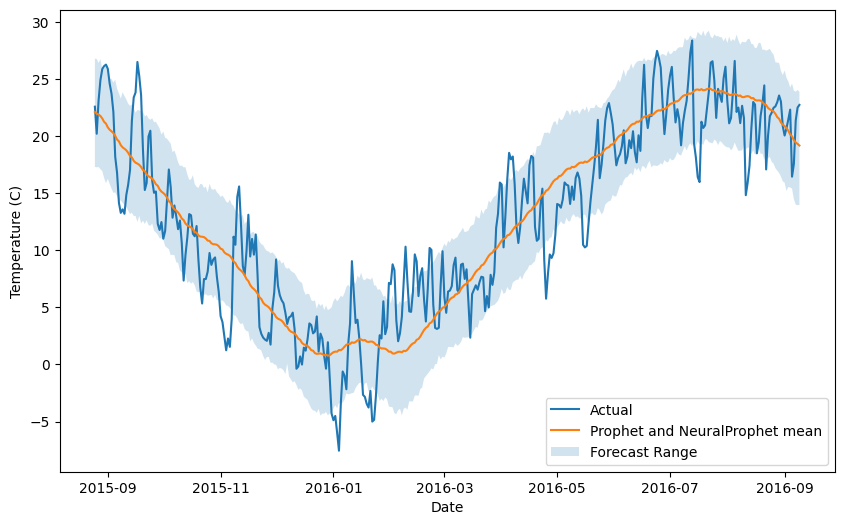

In [15]:
plt.figure(figsize=(10, 6))

# Plot the actual values
plt.plot(train_test_future['ds'], train_test_future['temp'], label='Actual')



# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(train_test_future['ds'], train_test_future['mean'], label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(train_test_future['ds'], train_test_future['yhat_upper'], train_test_future['yhat_lower'], alpha=0.2, label='Forecast Range')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (C)')

# Show the plot
plt.show()

From the above graph, we can clearly see that both Prophet and NeuralProphet have performed well. The shaded region shows the maximum and minimum temperatures. The orange line passes perfectly in the middle of the actual temperature. There are some points on the graph where we can see that the model has not performed well. This can be because weather is difficult to predict. Overall, the model has made a good prediction.

## Now using both Prophet and NeuralProphet libraries to make forecasts on 4 different time series data - temperature, wind, humidity, and pressure for next 30 days

For each variable, the code first fits a Prophet model to the data and uses it to make a 30-day forecast. It then fits a NeuralProphet model to the same data and also uses it to make a 30-day forecast.

The code loads the time-series data of <code>temperature, wind, humidity, and pressure</code>, and fits Prophet and NeuralProphet models to each of them. It then generates 30-day forecasts for each model and merges them to get the mean forecast. Finally, it plots the mean forecast along with the upper and lower bounds of the forecast generated by each model.

The plot shows that the mean forecast generated by <code>Prophet</code> and <code>NeuralProphet</code> models is quite similar, with small differences in the upper and lower bounds. It also shows that the NeuralProphet model generates slightly wider bounds compared to the Prophet model, indicating higher uncertainty in the forecast. Overall, the code provides a simple and efficient way to compare the performance of Prophet and NeuralProphet models on different time-series datasets.

02:59:17 - cmdstanpy - INFO - Chain [1] start processing
02:59:17 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 132
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (120) is too small than the required number for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 120it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


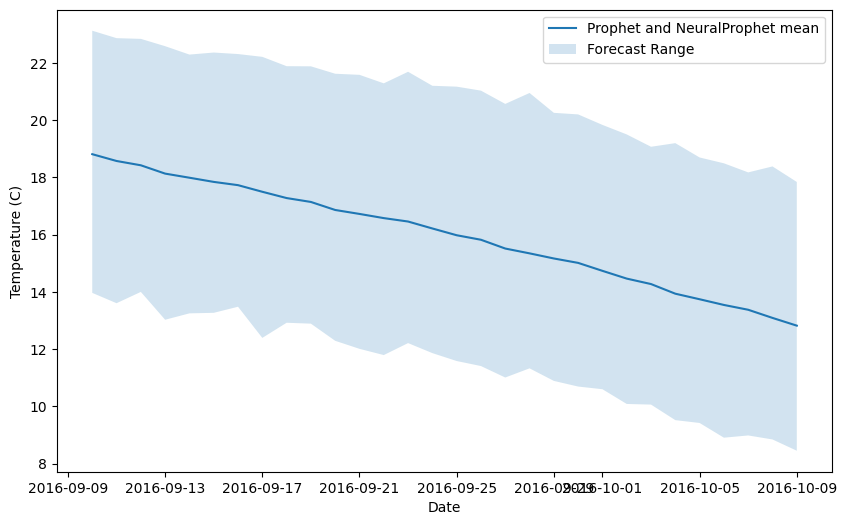

In [16]:
temp_model = Prophet()
temp_model.fit(temp)

future = temp_model.make_future_dataframe(periods=30)
temp_forecast_1 = temp_model.predict(future)


temp_model_np = NeuralProphet()
temp_model_np.fit(temp)
forecasts_2 = temp_model_np.make_future_dataframe(df=temp, periods=30)
temp_forecast_2 = temp_model_np.predict(forecasts_2)

future_temp = pd.merge(temp_forecast_1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], temp_forecast_2[['ds', 'yhat1']], on='ds')
future_temp = future_temp.rename(columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_temp['mean'] = (future_temp['Prophet'] + future_temp['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_temp['ds'], future_temp['mean'], label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_temp['ds'], future_temp['yhat_upper'],
                 future_temp['yhat_lower'], alpha=0.2, label='Forecast Range')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (C)')

# Show the plot
plt.show()


03:00:38 - cmdstanpy - INFO - Chain [1] start processing
03:00:38 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 132
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (120) is too small than the required number for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 120it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


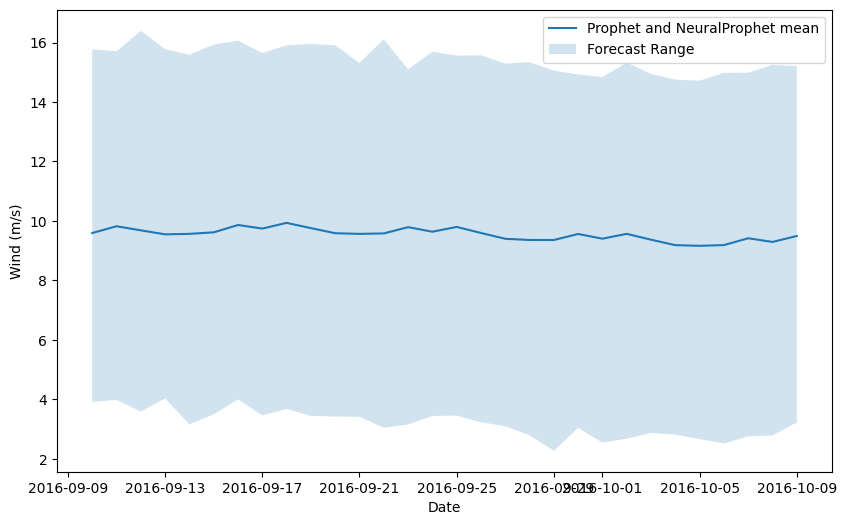

In [17]:
wind_model = Prophet()
wind_model.fit(wind)

future = wind_model.make_future_dataframe(periods=30)
wind_forecast_1 = wind_model.predict(future)


wind_model_np = NeuralProphet()
wind_model_np.fit(wind)
forecasts_2 = wind_model_np.make_future_dataframe(df=wind, periods=30)
wind_forecast_2 = wind_model_np.predict(forecasts_2)

future_wind = pd.merge(wind_forecast_1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], wind_forecast_2[['ds', 'yhat1']], on='ds')
future_wind = future_wind.rename(columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_wind['mean'] = (future_wind['Prophet'] + future_wind['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_wind['ds'], future_wind['mean'], label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_wind['ds'], future_wind['yhat_upper'],
                 future_wind['yhat_lower'], alpha=0.2, label='Forecast Range')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Wind (m/s)')

# Show the plot
plt.show()


03:02:16 - cmdstanpy - INFO - Chain [1] start processing
03:02:16 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 132
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (120) is too small than the required number for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 120it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


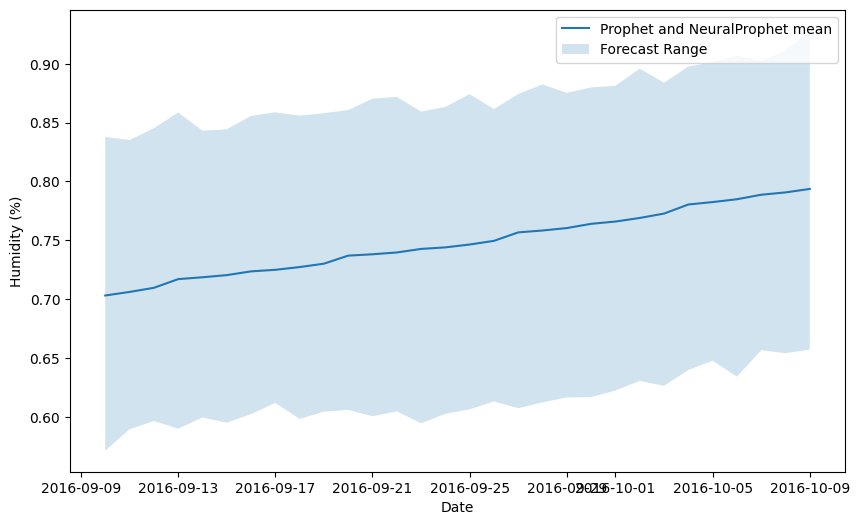

In [18]:

model_hum = Prophet()
model_hum.fit(hum)

future = model_hum.make_future_dataframe(periods=30)
hum_forecast_1 = model_hum.predict(future)


model_hum_np = NeuralProphet()
model_hum_np.fit(hum)
forecasts_2 = model_hum_np.make_future_dataframe(df=hum, periods=30)
hum_forecast_2 = model_hum_np.predict(forecasts_2)

future_hum = pd.merge(hum_forecast_1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], hum_forecast_2[['ds', 'yhat1']], on='ds')
future_hum = future_hum.rename(columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_hum['mean'] = (future_hum['Prophet'] + future_hum['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_hum['ds'], future_hum['mean'], label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_hum['ds'], future_hum['yhat_upper'],
                 future_hum['yhat_lower'], alpha=0.2, label='Forecast Range')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Humidity (%)')

# Show the plot
plt.show()


03:03:45 - cmdstanpy - INFO - Chain [1] start processing
03:03:45 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 132
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (120) is too small than the required number for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 120it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


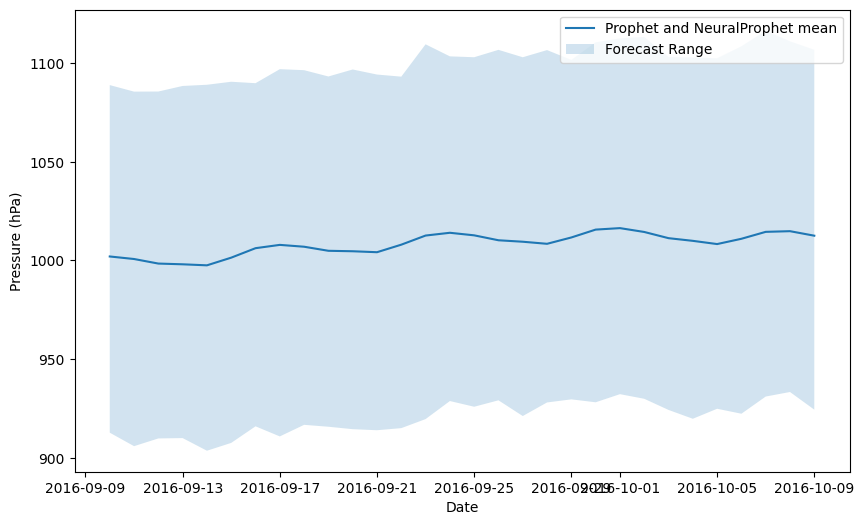

In [19]:

model_press = Prophet()
model_press.fit(press)

future = model_press.make_future_dataframe(periods=30)
press_forecast_1 = model_press.predict(future)


model_press_np = NeuralProphet()
model_press_np.fit(press)
forecasts_2 = model_press_np.make_future_dataframe(df=press, periods=30)
press_forecast_2 = model_press_np.predict(forecasts_2)

future_press = pd.merge(press_forecast_1[[
                      'ds', 'yhat', 'yhat_upper', 'yhat_lower']], press_forecast_2[['ds', 'yhat1']], on='ds')
future_press = future_press.rename(
    columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_press['mean'] = (future_press['Prophet'] + future_press['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_press['ds'], future_press['mean'],
         label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_press['ds'], future_press['yhat_upper'],
                 future_press['yhat_lower'], alpha=0.2, label='Forecast Range')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')

# Show the plot
plt.show()


## Now on forecast generated by Prophet and NeuralProphet models lets predict what will be the weather on that day and what will be the precipitation

First lets creates a new pandas DataFrame called <code>future_30</code>.

The below code block combains data for the next 30 days, with columns for <code>'ds' (datestamp), 'temp' (temperature), 'hum' (humidity), 'wind' (wind speed), and 'press' (atmospheric pressure)</code>.

The data is taken from separate pandas DataFrames called <code>'future_temp', 'future_wind', 'future_hum', and 'future_press'</code>, which contain information on the mean temperature, wind speed, humidity, and atmospheric pressure for the next 30 days, respectively.

The code then resets the index of <code>future_30</code> to start at 0 and drops the old index column, resulting in a DataFrame with columns for datestamp and weather variables for the next 30 days.

In [20]:
future_30 = pd.DataFrame({
    'ds': future_temp['ds'],
    'temp': future_temp['mean'],
    'temp_max':future_temp['yhat_upper'],
    'temp_min':future_temp['yhat_lower'],
    'wind': future_wind['mean'],
    'wind_max':future_wind['yhat_upper'],
    'wind_min':future_wind['yhat_lower'],
    'hum': future_hum['mean'],
    'hum_max':future_hum['yhat_upper'],
    'hum_min':future_hum['yhat_lower'],
    'press': future_press['mean'],
    'press_max':future_press['yhat_upper'],
    'press_min':future_press['yhat_lower'],
})
future_30 = future_30.reset_index()

future_30 = future_30.drop('index', axis=1)
future_30


,ds,temp,temp_max,temp_min,wind,wind_max,wind_min,hum,hum_max,hum_min,press,press_max,press_min
0,2016-09-10,18.810176,23.122447,13.965892,9.593446,15.779754,3.910892,0.703065,0.837868,0.571155,1002.006237,1088.817730,912.756657
1,2016-09-11,18.572549,22.862748,13.604979,9.822159,15.703988,3.979262,0.706084,0.835178,0.589424,1000.721046,1085.507267,905.922063
2,2016-09-12,18.422114,22.837902,14.000164,9.683358,16.399727,3.584515,0.709598,0.845174,0.596343,998.415044,1085.557926,909.837111
3,2016-09-13,18.131446,22.582169,13.027309,9.548877,15.777561,4.026371,0.716970,0.858579,0.589917,998.040882,1088.378241,910.017955
4,2016-09-14,17.987970,22.289241,13.250525,9.565323,15.592243,3.157185,0.718544,0.843101,0.599359,997.520335,1088.983280,903.614154
5,2016-09-15,17.842136,22.360234,13.269262,9.616630,15.932905,3.494161,0.720374,0.844234,0.594981,1001.411243,1090.507756,907.578800
6,2016-09-16,17.728281,22.307767,13.481478,9.863487,16.066530,3.994726,0.723561,0.855720,0.602284,1006.206307,1089.779413,915.978857
7,2016-09-17,17.497054,22.209948,12.393068,9.743433,15.646703,3.459158,0.724895,0.858702,0.611811,1007.878535,1096.878559,910.863550
8,2016-09-18,17.277474,21.883696,12.922207,9.935371,15.910430,3.676679,0.727218,0.855890,0.598140,1006.943650,1096.371856,916.735105
9,2016-09-19,17.141587,21.878782,12.890754,9.758942,15.955923,3.440793,0.730105,0.857989,0.604322,1004.885143,1093.179483,915.763572


In [100]:
daily_temperatures

,ds,temp,hum,wind,press,summary,precip
0,2006-04-01,12.683102,0.720000,11.844904,1016.463750,7,1
1,2006-04-02,12.396296,0.757083,6.555383,1014.355833,7,1
2,2006-04-03,12.326157,0.726667,6.442013,1013.680417,7,1
3,2006-04-04,8.624306,0.835417,10.719246,1014.849583,7,1
4,2006-04-05,10.767824,0.733750,13.727933,1009.813750,6,1
...,...,...,...,...,...,...,...
3810,2016-09-05,16.446296,0.889167,9.841796,1012.928333,5,1
3811,2016-09-06,17.572222,0.809583,9.498329,1017.695417,5,1
3812,2016-09-07,21.373380,0.731667,7.629387,1020.437083,7,1
3813,2016-09-08,22.499537,0.615833,6.576179,1016.133333,7,1


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = daily_temperatures[['temp', 'hum', 'wind', 'press']].values
y = daily_temperatures['summary'].values

y_ = LabelEncoder()
y_e = y_.fit_transform(y)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_e_train, y_e_test = train_test_split(X, y_e, test_size=0.2, random_state=42)


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.5360419397116645


### Now with the future values we will predicit Summary and Precipitation

In [79]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le_summary = LabelEncoder()
le_precip = LabelEncoder()
# Fit the encoder to the labels and transform them
encoded_labels_summarry = le_summary.fit_transform(daily_temperatures['summary'])
print('Encoded labels:', encoded_labels_summarry)
daily_temperatures['summary'] = encoded_labels_summarry

encoded_labels_precipitation = le_precip.fit_transform(daily_temperatures['precip'])
print('Encoded labels:', encoded_labels_precipitation)
daily_temperatures['precip'] = encoded_labels_precipitation


Encoded labels: [7 7 7 ... 7 7 7]
Encoded labels: [1 1 1 ... 1 1 1]


The above code block performing label encoding on the <code>summary</code> and <code>precip</code> columns of the 'daily_temperatures' dataframe using the LabelEncoder class from the scikit-learn library.

First, two LabelEncoder objects are created using the <code>LabelEncoder()</code> constructor. Then, the <code></code>fit_transform()</code> method of each encoder is called on the <code>summary</code>  and <code>precip</code> columns of the 'daily_temperatures' dataframe. This method fits the encoder to the labels in the column and returns an encoded version of the labels.

The encoded labels for <code>summary</code> and  <code>precip</code> are then printed to the console using the print() function. Finally, the <code>summary</code> and  <code>precip</code> columns of the 'daily_temperatures' dataframe are replaced with their encoded versions using the indexing operator and the encoded labels.

WARNING - (py.warnings._showwarnmsg) - d:\temp\ipykernel_19048\1175284857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = daily_temperatures.corr()



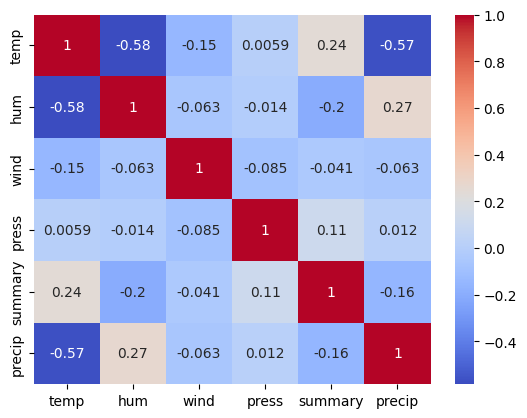

In [80]:
corrMatrix = daily_temperatures.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()


The above code The correlation matrix shows the correlation coefficient between each pair of variables. Based on the correlation matrix, we can see that:

- The temperature is negatively correlated with humidity and precipitation, but positively correlated with the summary.
- The humidity is negatively correlated with the summary, but positively correlated with precipitation.
- The wind is not strongly correlated with any other variable.
- The pressure is not strongly correlated with precipitation but positively correlated with the summary. .
- The summary is positively correlated with temperature and pressure, but negatively correlated with humidity and precipitation.
- The precipitation is negatively correlated with temperature, but positively correlated with humidity.

Therefore, we can say that the summary is dependent on temperature, humidity, wind, and pressure, but not on precipitation. And precipitation is dependent on humidity but not on the other variables.


#### Using LSTM (Long Short-Term Memory) models for predicting weather summary and precipitation

But why to use using LSTM (Long Short-Term Memory) models the simple reason is :
1. **Sequence Modeling:** LSTM models are particularly effective for sequence modeling tasks, such as time series forecasting. Weather data often exhibits temporal patterns, where the current weather conditions depend on past observations. LSTM models can capture these dependencies and learn long-term relationships in the data.

2. **Handling Time Dependencies:** LSTM models have memory cells that can store and recall information over extended periods, making them suitable for capturing time dependencies in weather data. These models can understand and utilize the sequential nature of the data, allowing them to make predictions based on previous observations.

3. **Capturing Non-Linear Relationships:** LSTM models are capable of capturing non-linear relationships between input features and target variables. Weather patterns can be complex and influenced by multiple factors. LSTM models can learn these intricate relationships and make predictions based on the interplay of various weather features.

4. **Handling Variable-Length Sequences:** LSTM models can handle variable-length sequences, which is essential when dealing with weather data that may have varying numbers of observations or irregular time intervals. This flexibility allows the model to adapt to different data patterns and make accurate predictions even with missing or unevenly spaced data points.

5. **Feature Extraction:** LSTM models can automatically learn relevant features from the input data. This capability is particularly advantageous when dealing with complex weather datasets, as the model can identify the most informative features for predicting the weather summary and precipitation.

By utilizing LSTM models for weather prediction, we can leverage their ability to capture temporal dependencies, handle non-linear relationships, adapt to variable-length sequences, and automatically extract relevant features. These properties make LSTM models well-suited for forecasting weather-related variables like summary and precipitation.

In [81]:
from sklearn.model_selection import train_test_split

# Prepare the data
X = daily_temperatures[['temp', 'hum', 'wind', 'press']].values
y = daily_temperatures['summary'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


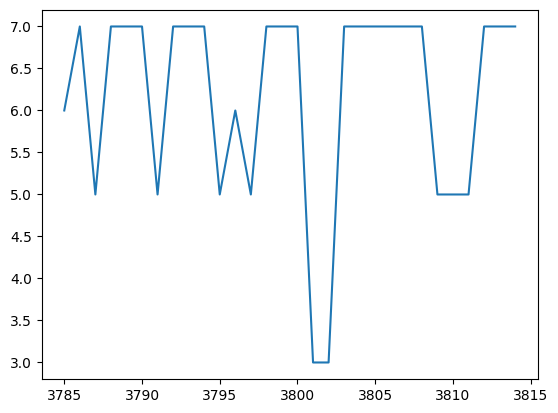

In [ ]:
plt.plot(daily_temperatures['summary'].tail(30))
#What was the weather for last 30 days

03:55:01 - cmdstanpy - INFO - Chain [1] start processing
03:55:01 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 132
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (120) is too small than the required number for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 120it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


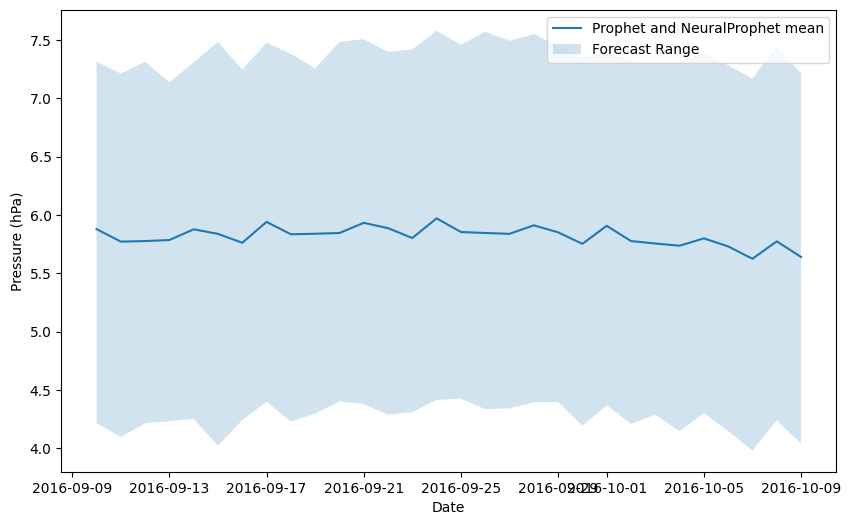

In [104]:

# Prepare the data
data = daily_temperatures[['ds', 'summary']]

model_sum = Prophet()
model_sum.fit(data)

future = model_sum.make_future_dataframe(periods=30)
press_forecast_1 = model_sum.predict(future)


model_sum_np = NeuralProphet()
model_sum_np.fit(data)
forecasts_2 = model_sum_np.make_future_dataframe(df=data, periods=30)
press_forecast_2 = model_sum_np.predict(forecasts_2)

future_press = pd.merge(press_forecast_1[[
                      'ds', 'yhat', 'yhat_upper', 'yhat_lower']], press_forecast_2[['ds', 'yhat1']], on='ds')
future_press = future_press.rename(
    columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_press['mean'] = (future_press['Prophet'] + future_press['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_press['ds'], future_press['mean'],
         label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_press['ds'], future_press['yhat_upper'],
                 future_press['yhat_lower'], alpha=0.2, label='Forecast Range')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')

# Show the plot
plt.show()


In [112]:
import numpy as np

rounded_values = np.ceil(future_press['mean']).astype(int)

predicted_labels_summary = le_summary.inverse_transform(rounded_values)

# Assign the unencoded labels to the 'summary' column in the future_30 DataFrame
future_30['summary'] = predicted_labels_summary


In [113]:
future_30

,ds,temp,temp_max,temp_min,wind,wind_max,wind_min,hum,hum_max,hum_min,press,press_max,press_min,summary
0,2016-09-10,18.810176,23.122447,13.965892,9.593446,15.779754,3.910892,0.703065,0.837868,0.571155,1002.006237,1088.817730,912.756657,Overcast
1,2016-09-11,18.572549,22.862748,13.604979,9.822159,15.703988,3.979262,0.706084,0.835178,0.589424,1000.721046,1085.507267,905.922063,Overcast
2,2016-09-12,18.422114,22.837902,14.000164,9.683358,16.399727,3.584515,0.709598,0.845174,0.596343,998.415044,1085.557926,909.837111,Overcast
3,2016-09-13,18.131446,22.582169,13.027309,9.548877,15.777561,4.026371,0.716970,0.858579,0.589917,998.040882,1088.378241,910.017955,Overcast
4,2016-09-14,17.987970,22.289241,13.250525,9.565323,15.592243,3.157185,0.718544,0.843101,0.599359,997.520335,1088.983280,903.614154,Overcast
5,2016-09-15,17.842136,22.360234,13.269262,9.616630,15.932905,3.494161,0.720374,0.844234,0.594981,1001.411243,1090.507756,907.578800,Overcast
6,2016-09-16,17.728281,22.307767,13.481478,9.863487,16.066530,3.994726,0.723561,0.855720,0.602284,1006.206307,1089.779413,915.978857,Overcast
7,2016-09-17,17.497054,22.209948,12.393068,9.743433,15.646703,3.459158,0.724895,0.858702,0.611811,1007.878535,1096.878559,910.863550,Overcast
8,2016-09-18,17.277474,21.883696,12.922207,9.935371,15.910430,3.676679,0.727218,0.855890,0.598140,1006.943650,1096.371856,916.735105,Overcast
9,2016-09-19,17.141587,21.878782,12.890754,9.758942,15.955923,3.440793,0.730105,0.857989,0.604322,1004.885143,1093.179483,915.763572,Overcast


In [115]:

# Prepare the data
data = daily_temperatures[['ds', 'press']]

model_sum = Prophet()
model_sum.fit(data)

future = model_sum.make_future_dataframe(periods=30)
press_forecast_1 = model_sum.predict(future)


model_sum_np = NeuralProphet()
model_sum_np.fit(data)
forecasts_2 = model_sum_np.make_future_dataframe(df=data, periods=30)
press_forecast_2 = model_sum_np.predict(forecasts_2)

future_press = pd.merge(press_forecast_1[[
                      'ds', 'yhat', 'yhat_upper', 'yhat_lower']], press_forecast_2[['ds', 'yhat1']], on='ds')
future_press = future_press.rename(
    columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_press['mean'] = (future_press['Prophet'] + future_press['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_press['ds'], future_press['mean'],
         label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_press['ds'], future_press['yhat_upper'],
                 future_press['yhat_lower'], alpha=0.2, label='Forecast Range')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')

# Show the plot
plt.show()


ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

We can use two tpye of loss in long short term memory that is :

1. **sparse_categorical_crossentropy:**
   - `sparse_categorical_crossentropy` is a loss function used for classification problems where the target variable has multiple categories. It is suitable when the classes are mutually exclusive, meaning each data point belongs to only one category.
   - This loss function measures the difference between the predicted probabilities of the categories and the true category labels.
   - It is commonly used when you want your model to classify data into distinct categories, such as predicting whether the weather will be sunny, cloudy, or rainy.
   - `sparse_categorical_crossentropy` requires the target variable to be encoded as integer labels.

2. **mean_squared_error:**
   - `mean_squared_error` is a loss function used for regression problems where the target variable is continuous. It is suitable when you want to predict a numerical value.
   - This loss function measures the average squared difference between the predicted values and the true continuous values.
   - It is commonly used when you want your model to predict a specific quantity, such as temperature or any other continuous variable.
   - `mean_squared_error` does not require any specific encoding of the target variable.

Considering that `daily_temperatures['summary']` values are continuous for the last 30 days, using `mean_squared_error` would be more appropriate as it has Continuous Values

`mean_squared_error` is specifically designed to handle regression problems where the target variable is continuous. It measures the average squared difference between the predicted values and the true values, making it suitable for predicting continuous variables like temperature. It focuses on the magnitude of the errors and penalizes larger errors more, which is important for accurate temperature predictions.


In [82]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout


In [83]:
# Reshape the input data to fit the LSTM input shape
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Bidirectional

# Create the LSTM model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(4, 1)))  # Convolutional layer with 32 filters and kernel size of 3
model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer with pool size of 2
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(64)))  # Bidirectional LSTM layer with 64 units
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))  # Dense layer with 32 units and ReLU activation
model.add(Dropout(0.2))

model.add(Dense(9, activation='softmax'))  # Output layer with 9 units for multi-class classification

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 9)                 297       
                                                                 
Total params: 19,273
Trainable params: 19,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=1, validation_data=(X_test_reshaped, y_test))


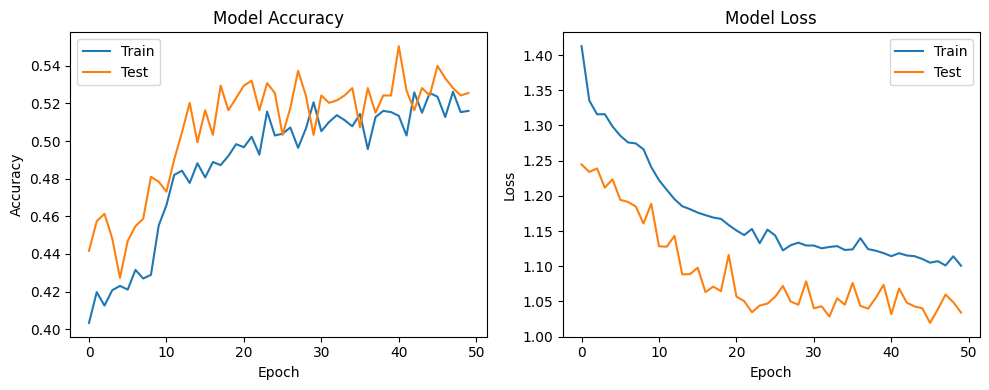

In [ ]:
# Plot the accuracy and loss curves
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
summary_m = model.predict(future_30[['temp', 'hum', 'wind', 'press']])

rounded_summary = np.round(summary_m).astype(int)


1/1 [==============================] - 1s 514ms/step


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare the data
X = daily_temperatures[['temp', 'hum', 'wind', 'press','summary']].values
y = daily_temperatures['precip'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


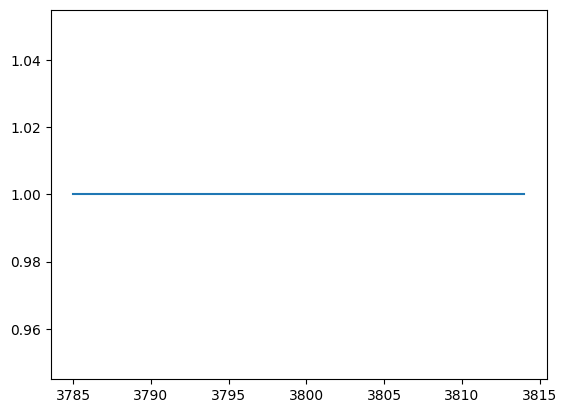

In [ ]:
plt.plot(daily_temperatures['precip'].tail(30))

By using mean_squared_error, we can maintain consistency in the modeling approach. Since the majority of your target variable approximately 85% `daily_temperatures['precip']` represents continuous values, using mean_squared_error aligns with the nature of the data. It ensures that the loss function reflects the goal of predicting precise numerical values for precipitation.

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(5, 1)))  # 5 features (temp, hum, wind, press,summary), input shape (sequence length = 5, number of features = 1)
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape the input data to fit the LSTM input shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/30
3052/3052 [==============================] - 17s 5ms/step - loss: 0.0216 - val_loss: 0.0122
Epoch 2/30
3052/3052 [==============================] - 10s 3ms/step - loss: 0.0122 - val_loss: 0.0171
Epoch 3/30
3052/3052 [==============================] - 8s 3ms/step - loss: 0.0114 - val_loss: 0.0037
Epoch 4/30
3052/3052 [==============================] - 10s 3ms/step - loss: 0.0108 - val_loss: 0.0060
Epoch 5/30
3052/3052 [==============================] - 12s 4ms/step - loss: 0.0106 - val_loss: 0.0041
Epoch 6/30
3052/3052 [==============================] - 12s 4ms/step - loss: 0.0108 - val_loss: 0.0054
Epoch 7/30
3052/3052 [==============================] - 19s 6ms/step - loss: 0.0103 - val_loss: 0.0052
Epoch 8/30
3052/3052 [==============================] - 19s 6ms/step - loss: 0.0101 - val_loss: 0.0037
Epoch 9/30
3052/3052 [==============================] - 16s 5ms/step - loss: 0.0102 - val_loss: 0.0041
Epoch 10/30
3052/3052 [==============================] - 12s 4ms/step - lo

24/24 [==============================] - 1s 3ms/step


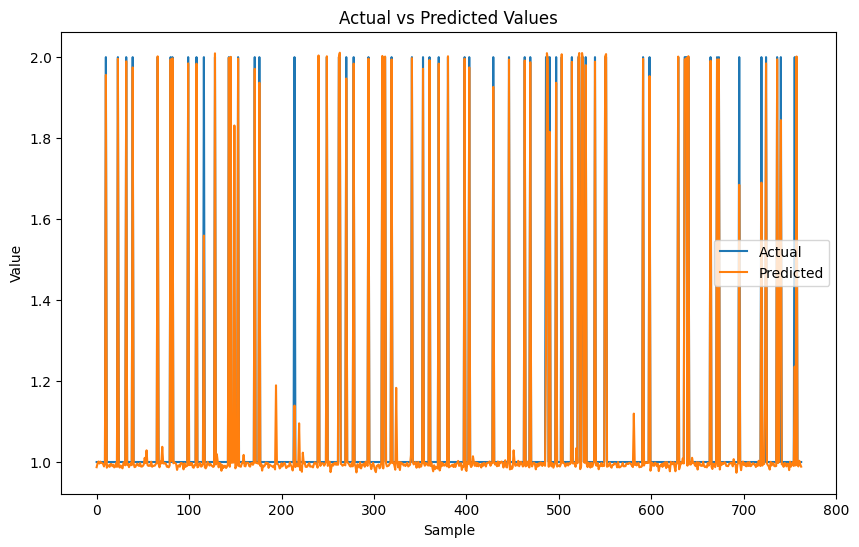

In [ ]:
import matplotlib.pyplot as plt

# Reshape the test data to match the LSTM input shape
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions using the trained model
y_pred = model.predict(X_test_reshaped)

# Create a plot to visualize the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
future_30['rounded_summary'] = rounded_summary
precip_m = model.predict(future_30[['temp', 'hum', 'wind', 'press','rounded_summary']])
future_30.drop('rounded_summary', axis=1, inplace=True)

rounded_precip = np.round(precip_m).astype(int)

1/1 [==============================] - 1s 593ms/step


In [ ]:
predicted_labels_summary = le_summary.inverse_transform(rounded_summary)

# Assign the unencoded labels to the 'summary' column in the future_30 DataFrame
future_30['summary'] = predicted_labels_summary

predicted_labels_precip = le_precip.inverse_transform(rounded_precip)

# Assign the unencoded labels to the 'summary' column in the future_30 DataFrame
future_30['precipitation'] = predicted_labels_precip

WARNING - (py.warnings._showwarnmsg) - e:\work\Code3\a\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

WARNING - (py.warnings._showwarnmsg) - e:\work\Code3\a\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Now we have assigneted the predicted values of summary and precipitation using long short term momory modeling hence we will be fitting it in the dataframe 'future_30'

## Final lets visualization the future prediction

In [ ]:
future_30

,ds,temp,temp_max,temp_min,wind,wind_max,wind_min,hum,hum_max,hum_min,press,press_max,press_min,summary,precipitation
0,2016-09-10,18.807784,23.026803,13.593002,9.608947,16.155841,4.350812,0.702566,0.840171,0.575458,1001.371533,1089.080896,908.373902,Overcast,rain
1,2016-09-11,18.549489,23.047154,13.726859,9.830376,16.227682,3.835549,0.705845,0.844376,0.588932,999.459144,1089.824587,909.095680,Overcast,rain
2,2016-09-12,18.415726,22.952320,13.424096,9.689649,15.763065,3.956541,0.708642,0.838023,0.578062,997.778081,1082.099782,898.882137,Overcast,rain
3,2016-09-13,18.121676,22.540252,13.300115,9.569260,15.627188,3.393394,0.716507,0.845156,0.607772,997.131214,1079.836461,899.650679,Overcast,rain
4,2016-09-14,17.949801,22.652806,12.864346,9.587818,15.931428,3.128043,0.718132,0.852335,0.601259,997.119822,1078.611379,896.875985,Overcast,rain
5,2016-09-15,17.816652,22.423229,13.160880,9.601733,16.181234,3.410233,0.719173,0.850803,0.598370,1000.509876,1088.657961,906.661856,Overcast,rain
6,2016-09-16,17.722464,22.446424,13.056910,9.855058,15.748098,3.239338,0.723388,0.847960,0.599686,1005.774118,1089.809753,916.240696,Overcast,rain
7,2016-09-17,17.476245,22.239213,12.872401,9.755660,16.290743,3.551348,0.724317,0.853444,0.578695,1006.912226,1101.318452,917.381114,Overcast,rain
8,2016-09-18,17.236615,21.798012,12.572526,9.939565,16.281628,3.934695,0.726915,0.849998,0.594336,1005.367783,1104.438795,917.440387,Overcast,rain
9,2016-09-19,17.118181,21.818822,12.645758,9.760512,15.746180,3.730336,0.729100,0.855968,0.601441,1003.953929,1096.699749,914.208462,Overcast,rain


### Time series plot of future 30-day weather forecast variables

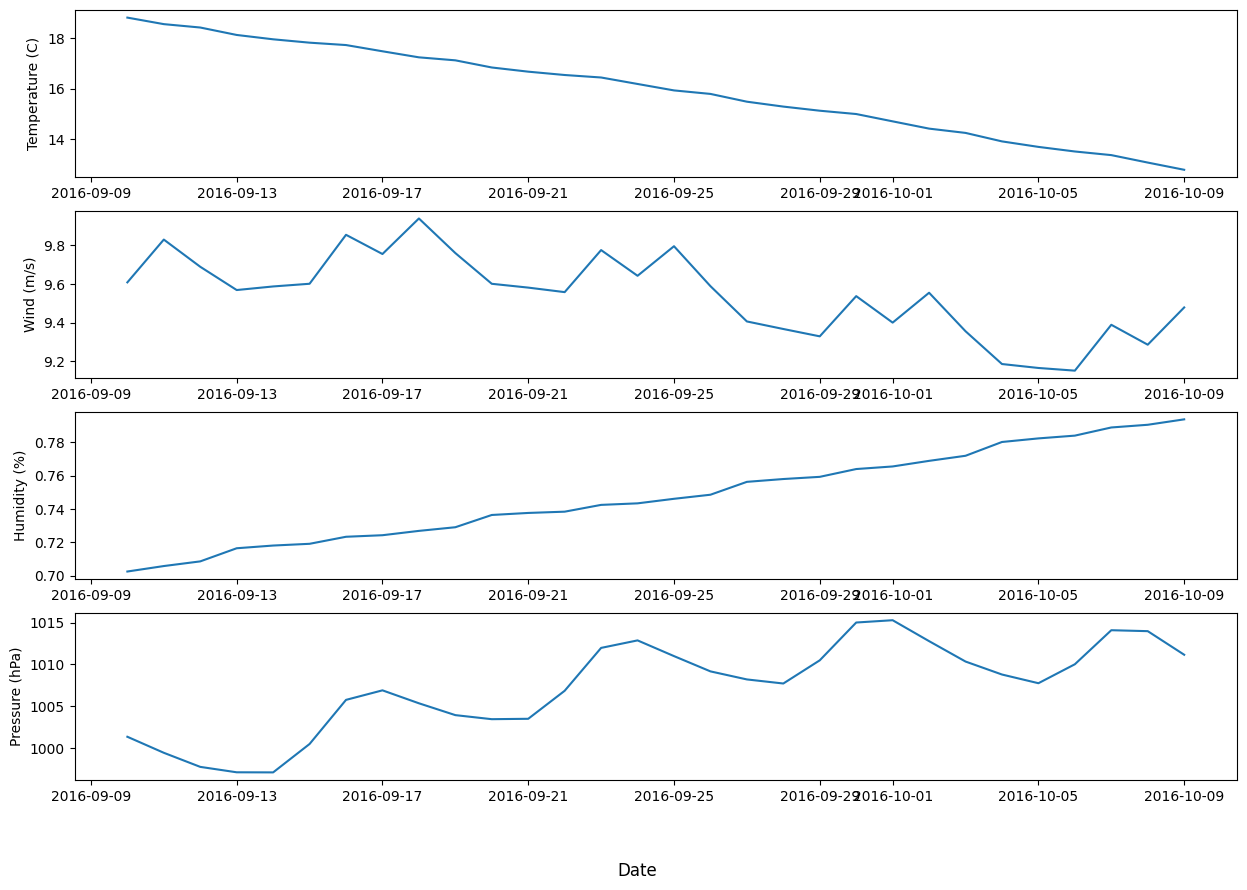

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 10))

# Plot the temperature on the first subplot
axs[0].plot(future_30['ds'], future_30['temp'])
axs[0].set_ylabel('Temperature (C)')

# Plot the wind on the second subplot
axs[1].plot(future_30['ds'], future_30['wind'])
axs[1].set_ylabel('Wind (m/s)')

# Plot the humidity on the third subplot
axs[2].plot(future_30['ds'], future_30['hum'])
axs[2].set_ylabel('Humidity (%)')

# Plot the pressure on the fourth subplot
axs[3].plot(future_30['ds'], future_30['press'])
axs[3].set_ylabel('Pressure (hPa)')

# Set a common x-label for all subplots
fig.supxlabel('Date')

# Show the plot
plt.show()


### Distribution of Precipitation Types

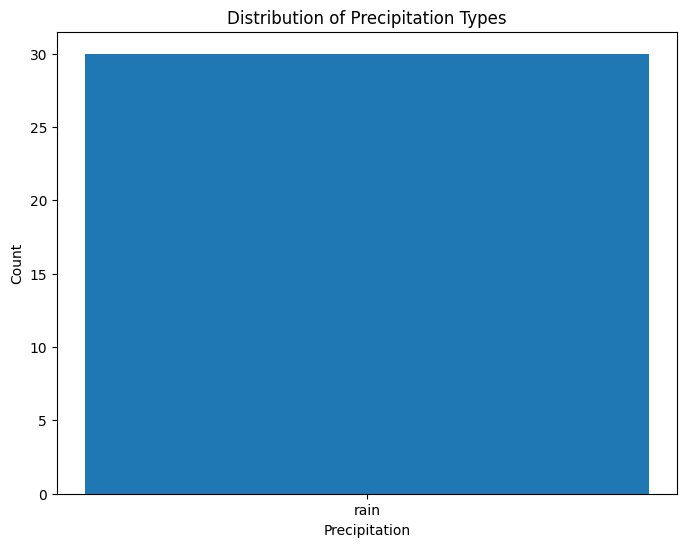

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
precip_counts = future_30['precipitation'].value_counts()
ax.bar(precip_counts.index, precip_counts.values)
ax.set_xlabel('Precipitation')
ax.set_ylabel('Count')
ax.set_title('Distribution of Precipitation Types')
plt.show()


### Description of weather summary

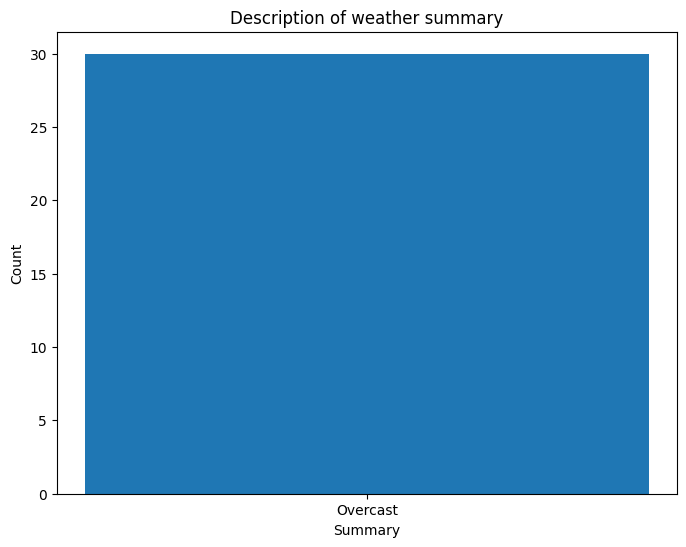

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
precip_counts = future_30['summary'].value_counts()
ax.bar(precip_counts.index, precip_counts.values)
ax.set_xlabel('Summary')
ax.set_ylabel('Count')
ax.set_title('Description of weather summary')
plt.show()


### Distribution of Weather Variables

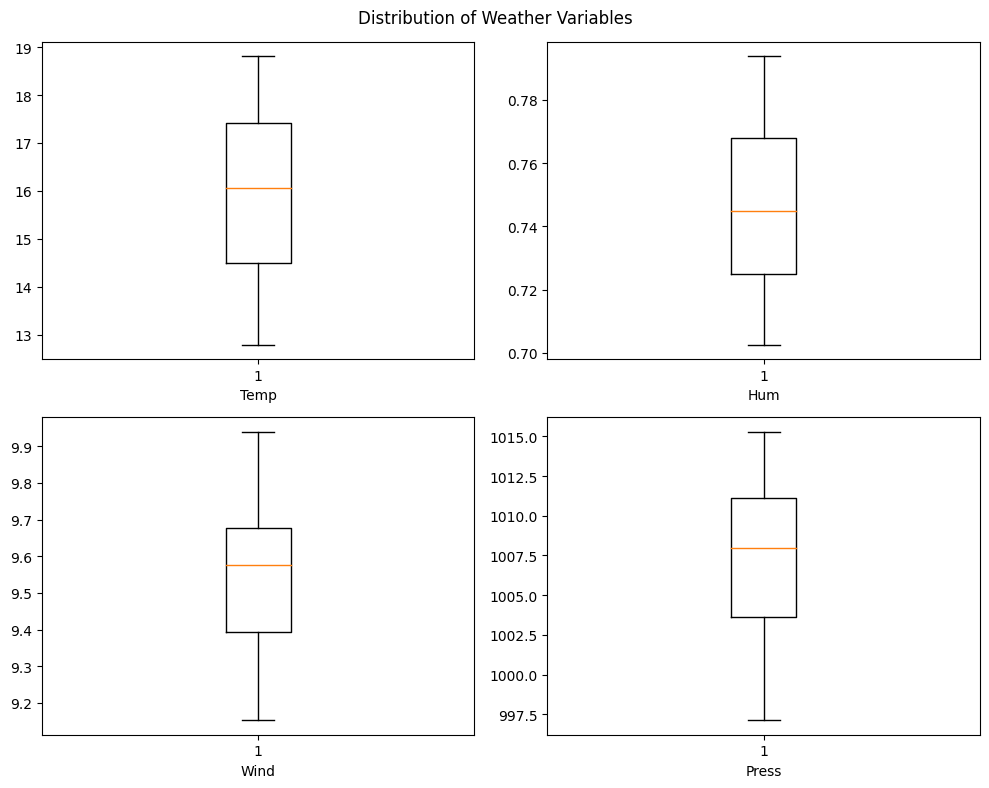

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(['temp', 'hum', 'wind', 'press']):
    axs[i].boxplot(future_30[col])
    axs[i].set_xlabel(col.capitalize())

fig.suptitle('Distribution of Weather Variables')
plt.tight_layout()
plt.show()
